In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
image_base = 'data/parse/images/'

with open('data/parse/train.json') as f:
    data = json.load(f)

{'conditions': [14], 'products': [17], 'reactants': [16]}
reactant 114.0 298.2 433.2 479.79999999999995
condition 550.16 254.32 812.26 293.25
product 1020.4 295.9 1393.2 534.8
{'conditions': [22, 41], 'products': [18], 'reactants': [17]}
reactant 1020.4 295.9 1393.2 534.8
condition 1334.5 274.2 1619.5 390.5
condition 1394.0 420.0 1569.5 488.4
product 1594.0 270.0 1964.2 523.0
{'conditions': [40], 'products': [23, 38, 34], 'reactants': [19]}
reactant 48.4 973.2 445.59999999999997 1153.3
condition 586.49 921.25 788.91 996.51
product 881.0 775.4 1344.0 1034.5
product 887.1 1075.8 1343.7 1333.0
product 1269.3 912.5 1700.6999999999998 1175.4
{'conditions': [5, 7], 'products': [37, 32, 31], 'reactants': [23, 38, 34]}
reactant 881.0 775.4 1344.0 1034.5
reactant 887.1 1075.8 1343.7 1333.0
reactant 1269.3 912.5 1700.6999999999998 1175.4
condition 1662.0 936.0 1960.0 1062.0
condition 1712.0 1070.0 1902.0 1156.0
product 1966.0 773.7 2427.9 1029.5
product 1976.5 1076.3 2425.5 1334.4
product 2357.3

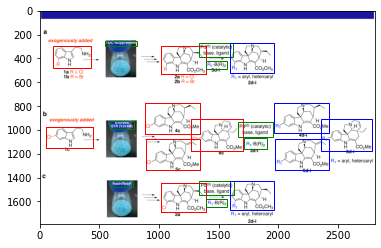

{'conditions': [], 'products': [6, 5], 'reactants': [1]}
reactant 116.7 4.0 356.7 149.0
product 596.0 1.0 837.0 148.0
product 998.0 7.0 1237.0 155.0


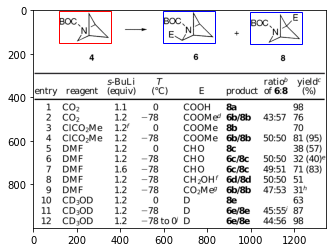

{'conditions': [8, 3], 'products': [5], 'reactants': [10]}
reactant 534.2 18.1 784.0 220.9
condition 344.0 104.1 508.9 161.0
condition 342.0 170.0 507.0 208.0
product 117.1 12.1 338.0 216.0
{'conditions': [4, 0], 'products': [7], 'reactants': [10]}
reactant 534.2 18.1 784.0 220.9
condition 803.0 68.0 965.0 159.0
condition 798.0 171.0 972.0 206.0
product 988.1 6.0 1235.0 226.0


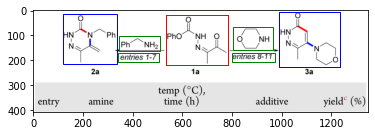

{'conditions': [5], 'products': [16], 'reactants': [15]}
reactant 0.0 95.5 228.0 350.0
condition 270.43 187.59 303.86 224.59
product 398.0 108.5 612.7 355.0
{'conditions': [1], 'products': [17], 'reactants': [16]}
reactant 398.0 108.5 612.7 355.0
condition 654.83 187.59 691.84 229.37
product 768.0 103.6 1034.5 357.0
{'conditions': [0], 'products': [19], 'reactants': [17]}
reactant 768.0 103.6 1034.5 357.0
condition 1110.85 191.17 1147.86 231.76
product 38.0 436.9 588.1 957.0
{'conditions': [18], 'products': [2], 'reactants': [19]}
reactant 38.0 436.9 588.1 957.0
condition 564.1 671.06 597.53 714.04
product 734.0 415.8 1236.0 926.0


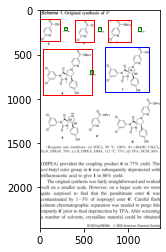

{'conditions': [6, 2, 3, 5], 'products': [4], 'reactants': [8, 7]}
reactant 82.0 83.0 179.0 143.0
reactant 329.0 83.0 550.0 143.1
condition 636.0 0.0 860.0 48.9
condition 643.51 49.92 804.13 106.85
condition 817.35 57.04 976.95 110.92
condition 665.0 134.1 955.9 183.89999999999998
product 1121.0 95.0 1265.0 148.0


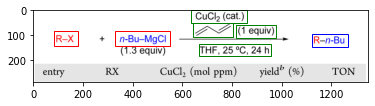

{'conditions': [1, 0], 'products': [3], 'reactants': [2]}
reactant 0.0 6.0 299.0 145.6
condition 309.0 0.0 680.0 54.4
condition 311.6 79.0 610.0 138.5
product 449.0 213.5 750.0 356.0
{'conditions': [10, 7], 'products': [4], 'reactants': [3]}
reactant 449.0 213.5 750.0 356.0
condition 753.0 182.0 1060.0 280.0
condition 756.0 298.0 926.0 350.0
product 1058.5 206.0 1352.0 356.0


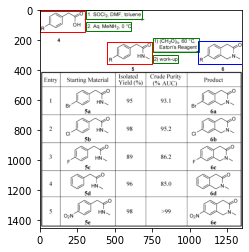

{'conditions': [18], 'products': [0], 'reactants': [9]}
reactant 198.98 233.81 368.12 357.21000000000004
condition 414.64 278.49 500.12 351.7
product 552.62 434.38 739.35 624.64
{'conditions': [16], 'products': [0], 'reactants': [8]}
reactant 906.26 237.33 1077.16 360.73
condition 677.34 276.03 897.35 353.15999999999997
product 552.62 434.38 739.35 624.64
{'conditions': [17], 'products': [0], 'reactants': [4, 12]}
reactant 126.84 444.94 285.43 508.52
reactant 123.48 555.57 295.97 607.7
condition 329.21 449.36 455.92999999999995 522.0600000000001
product 552.62 434.38 739.35 624.64
{'conditions': [7, 1], 'products': [0], 'reactants': [2]}
reactant 198.98 763.4 368.12 870.96
condition 303.18 641.84 471.15 719.94
condition 427.9 740.04 535.96 789.18
product 552.62 434.38 739.35 624.64
{'conditions': [14, 15], 'products': [0], 'reactants': [11]}
reactant 930.9 759.87 1098.27 869.2
condition 817.28 640.36 1078.04 713.07
condition 806.47 734.64 866.9100000000001 765.61
product 552.62 434.38 

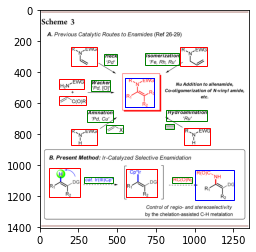

In [55]:
def convert_bbox(bbox):
    x1, y1, w, h = bbox
    return x1, y1, x1+w, y1+h

for i, image_data in enumerate(data['images']):
    path = image_base + image_data['file_name']
    img = cv2.imread(path)
    fig, ax = plt.subplots()
    ax.imshow(img)
    height, width, _ = img.shape
    for reaction in image_data['reactions']:
        print(reaction)
        for idx in reaction['reactants']:
            rct = image_data['bboxes'][idx]
            x1, y1, x2, y2 = convert_bbox(rct['bbox'])
            print('reactant', x1, y1, x2, y2)
            rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        for idx in reaction['conditions']:
            cnd = image_data['bboxes'][idx]
            x1, y1, x2, y2 = convert_bbox(cnd['bbox'])
            print('condition', x1, y1, x2, y2)
            rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='g', facecolor='none')
            ax.add_patch(rect)
        for idx in reaction['products']:
            prd = image_data['bboxes'][idx]
            x1, y1, x2, y2 = convert_bbox(prd['bbox'])
            print('product', x1, y1, x2, y2)
            rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='b', facecolor='none')
            ax.add_patch(rect)
#         break
    plt.show()
    if i > 5:
        break

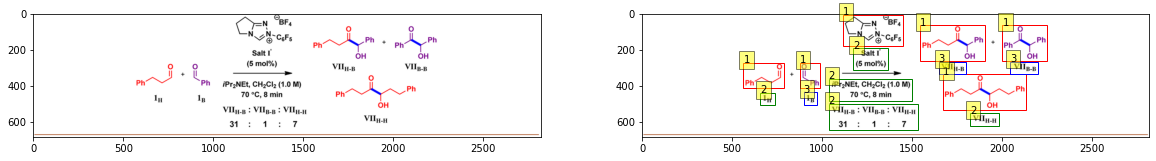

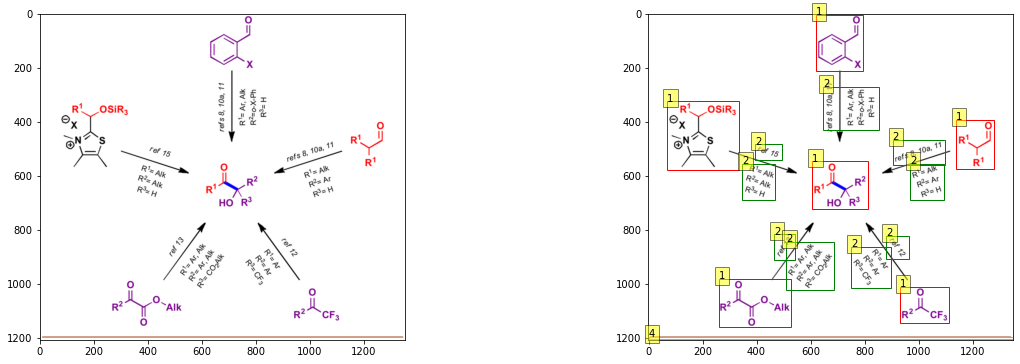

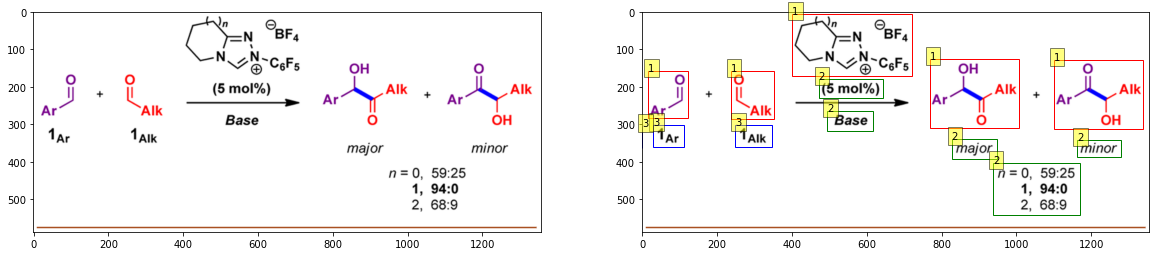

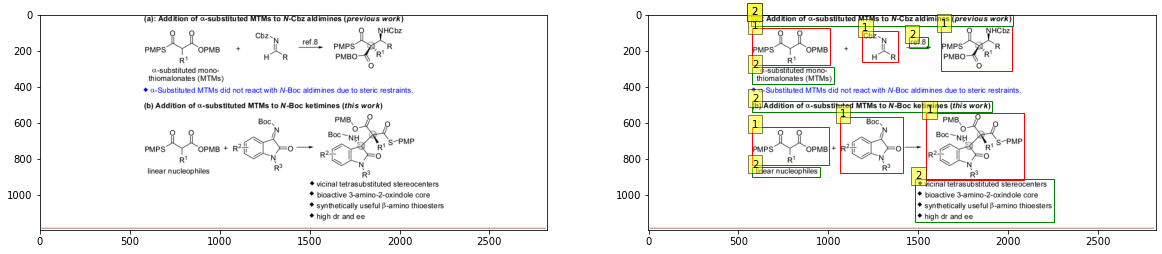

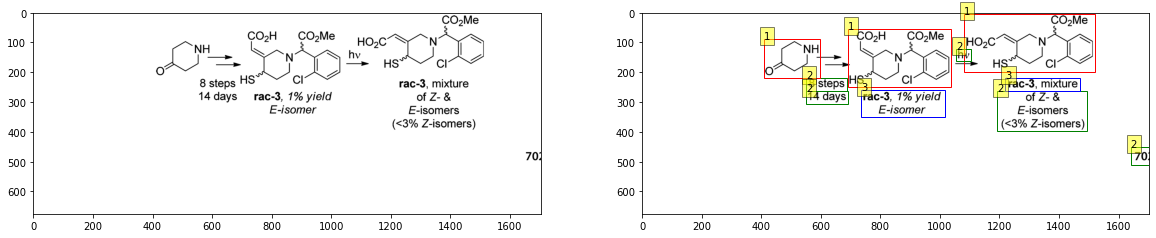

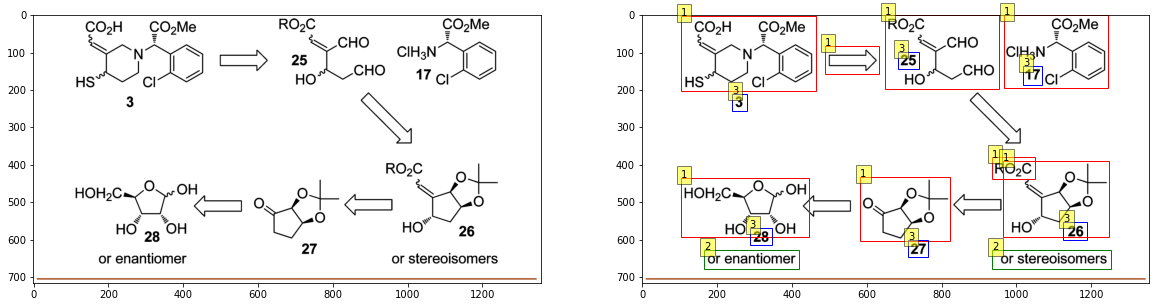

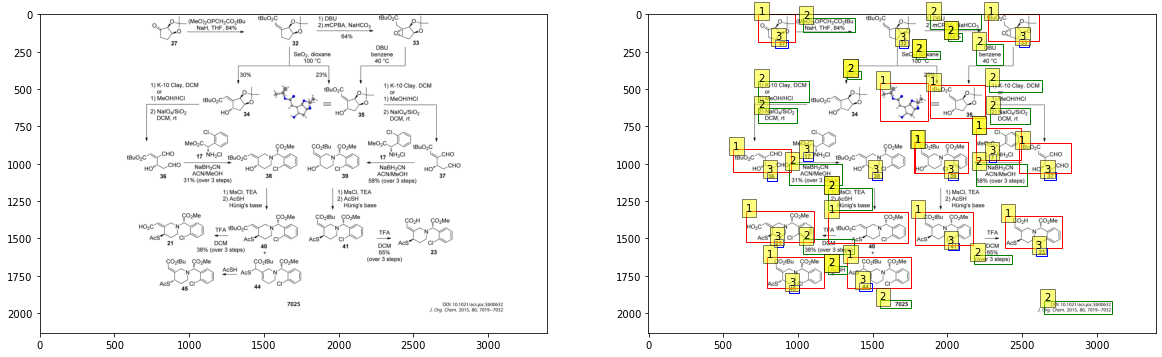

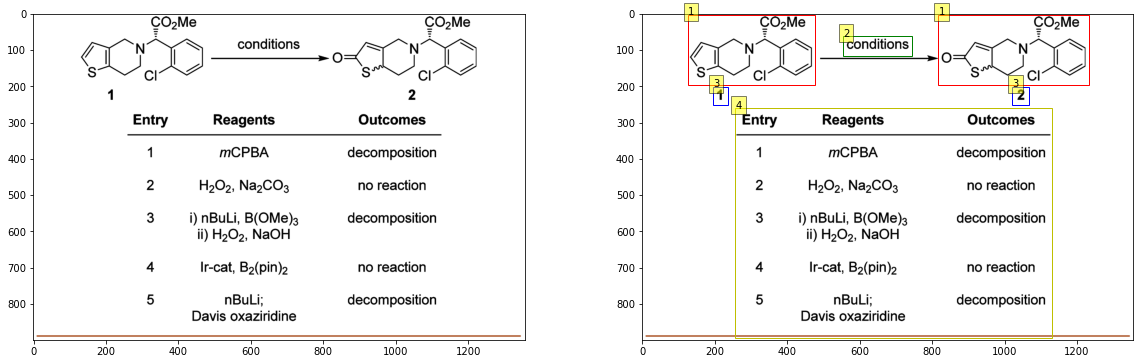

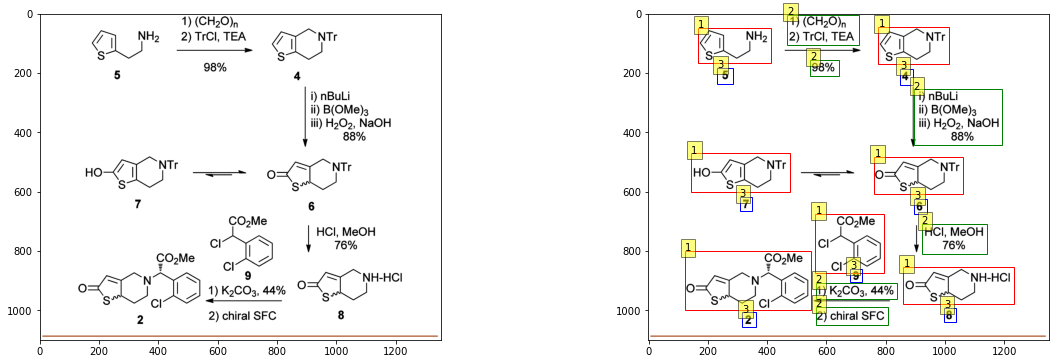

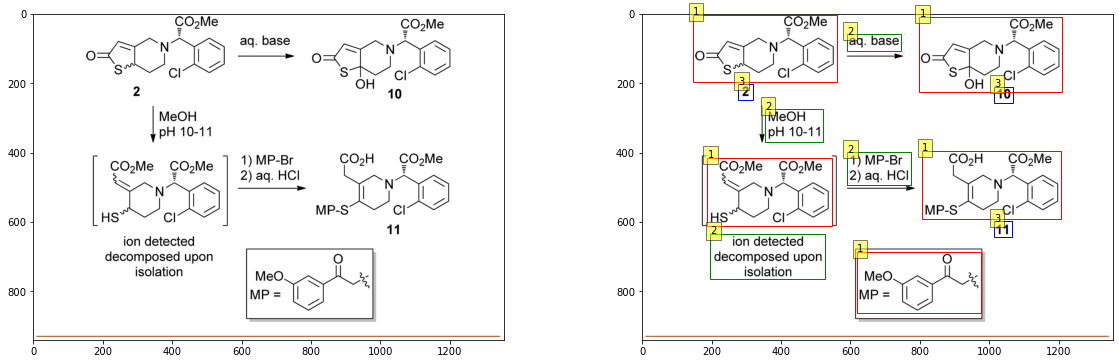

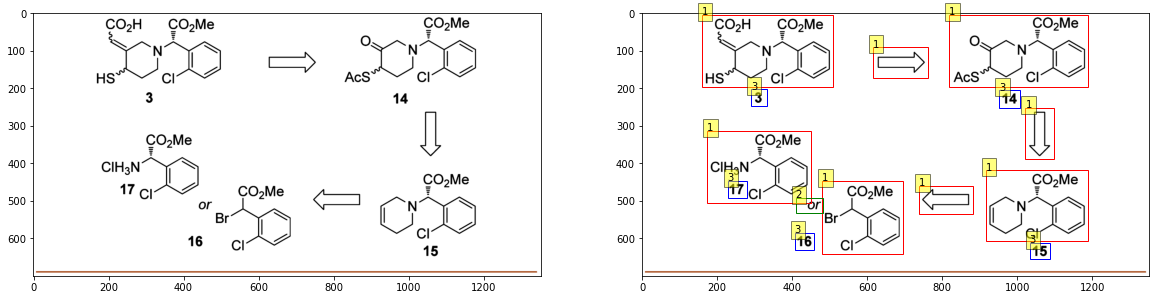

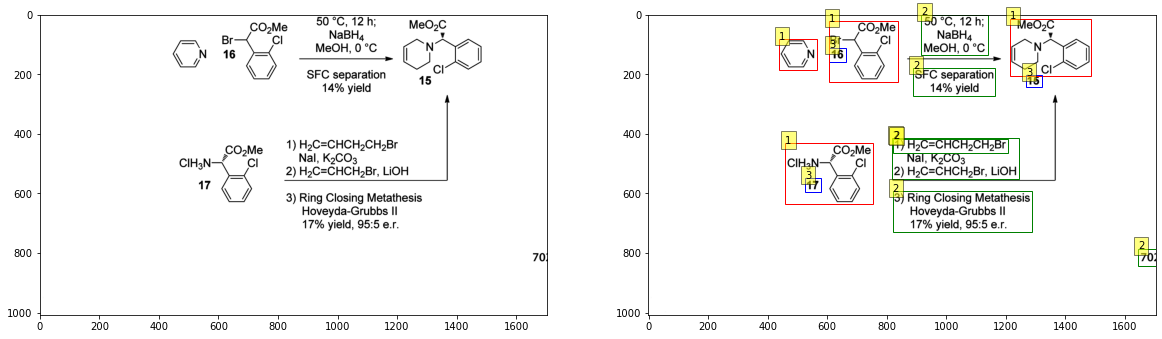

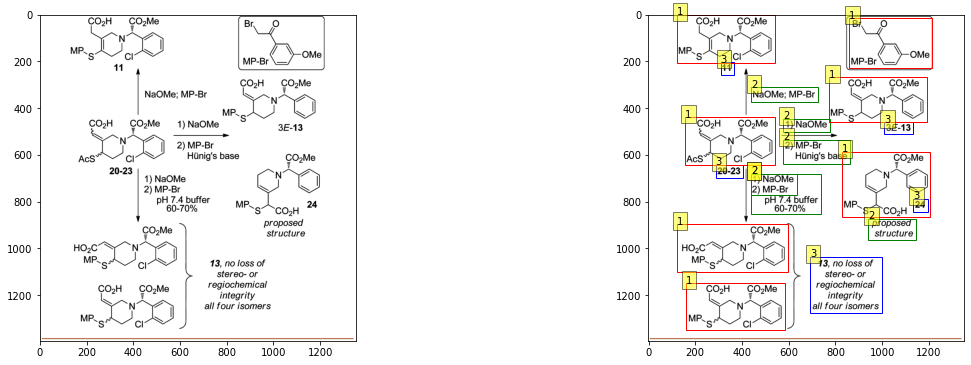

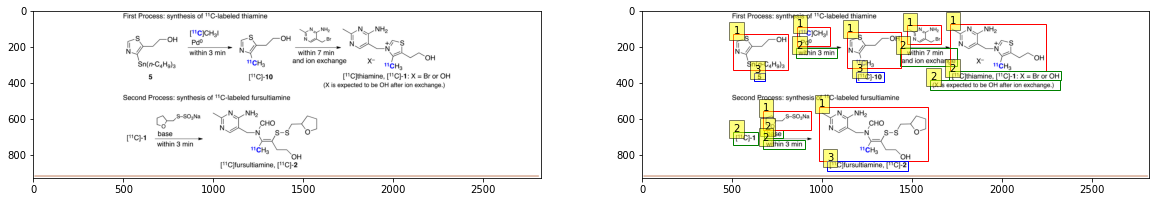

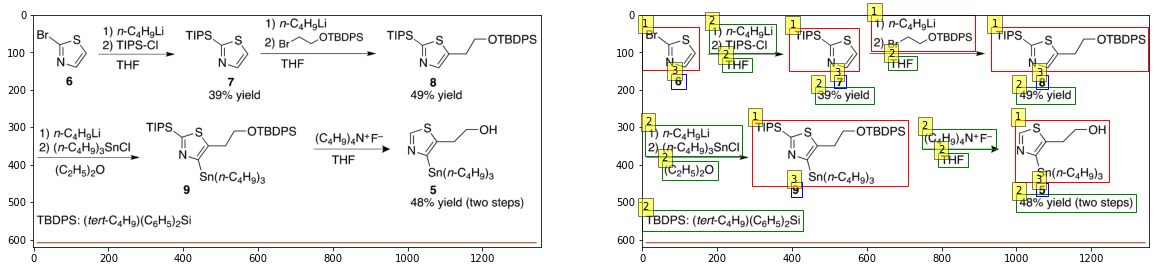

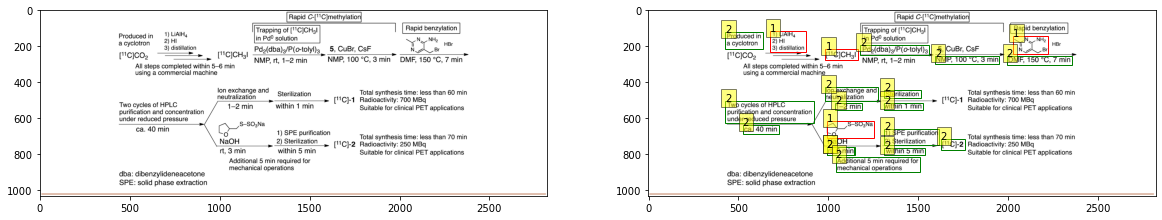

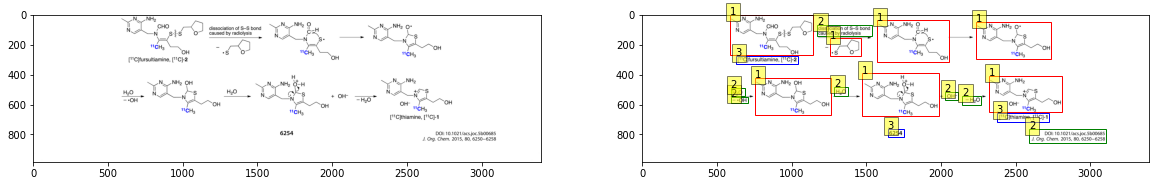

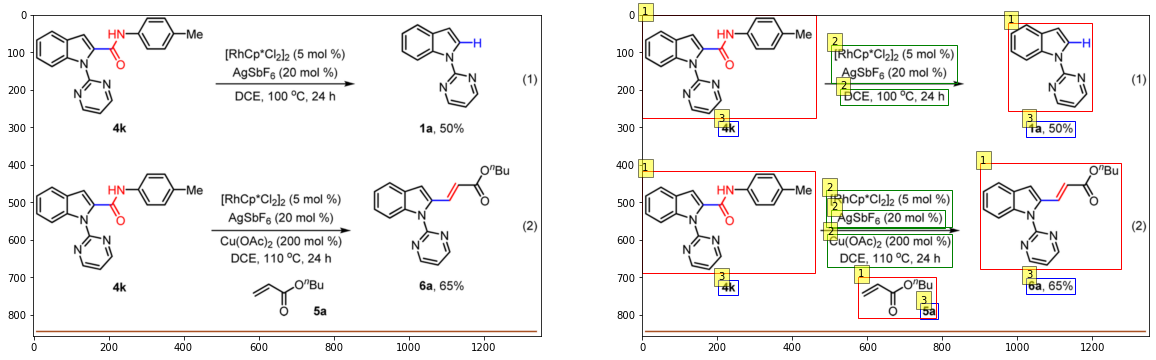

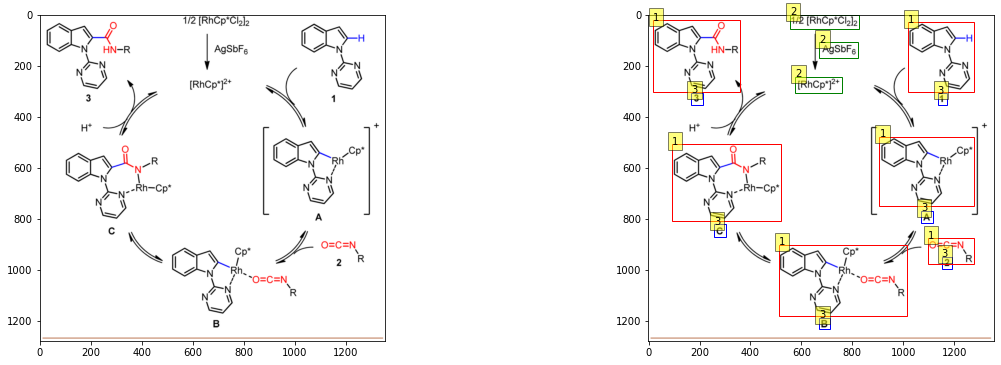

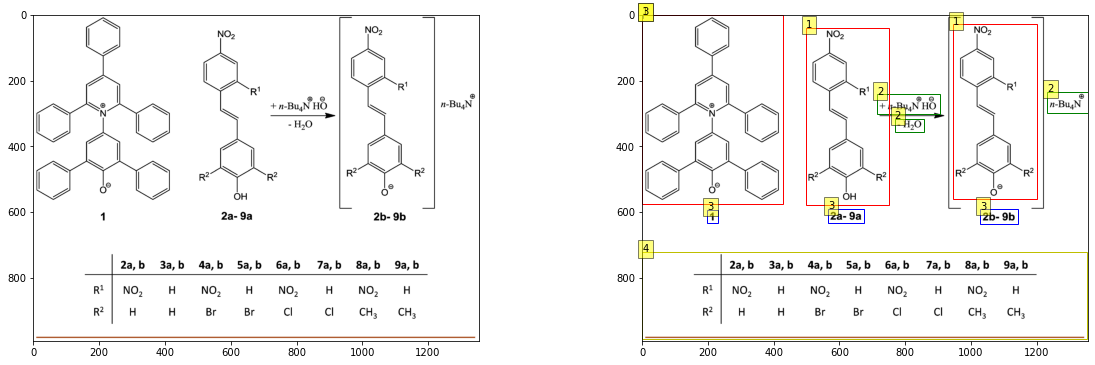

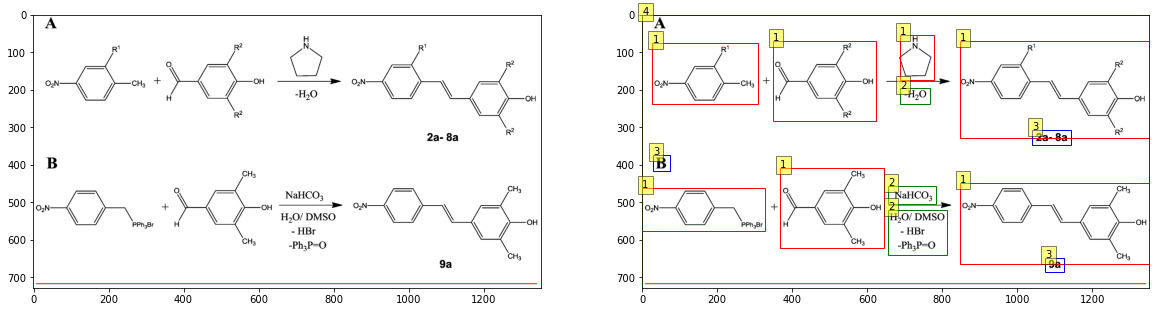

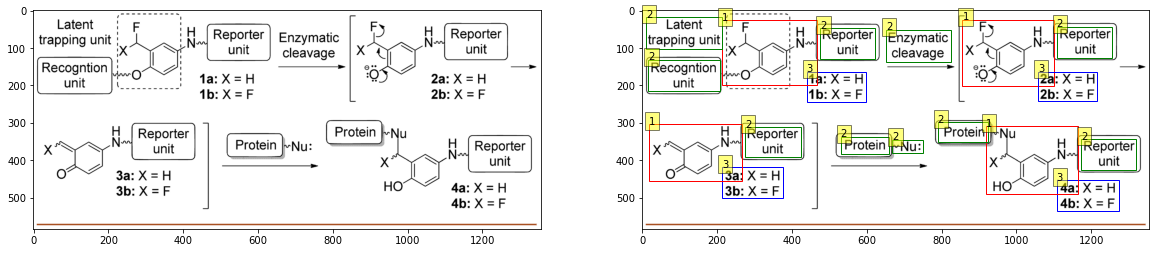

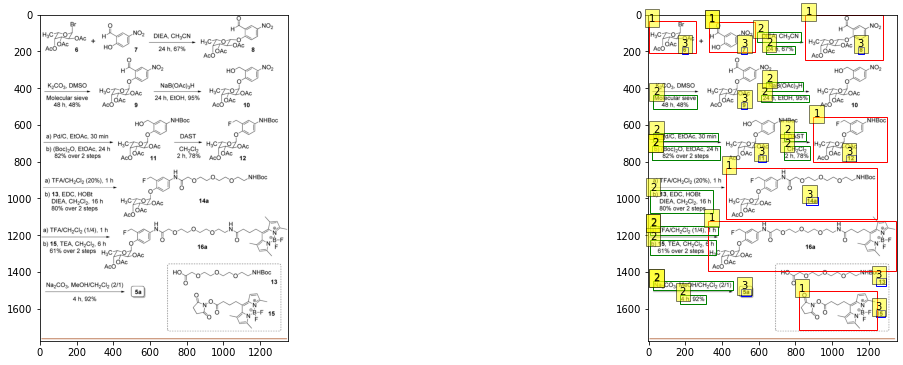

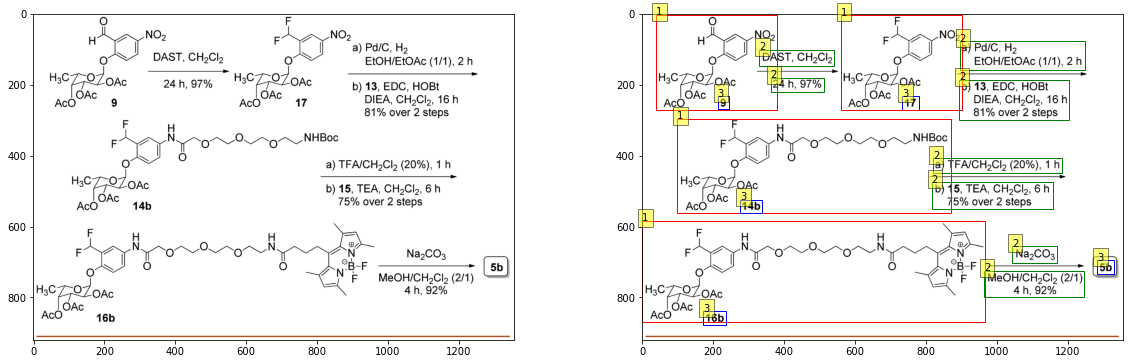

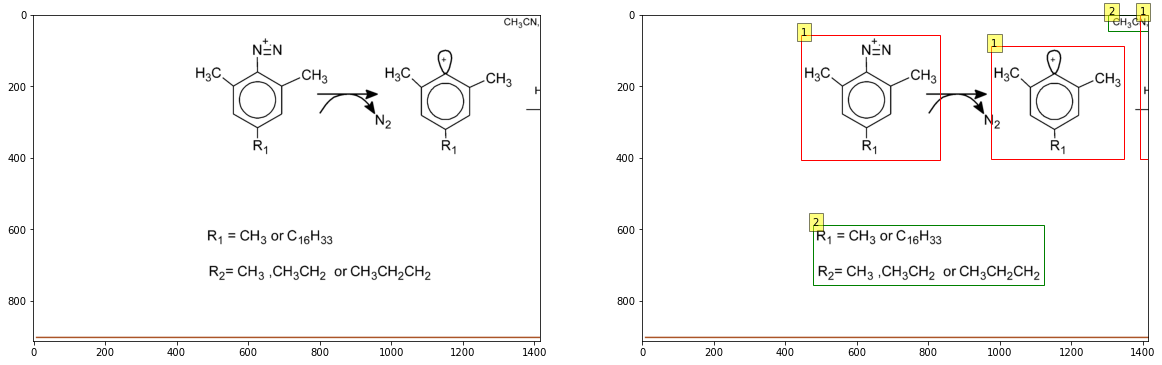

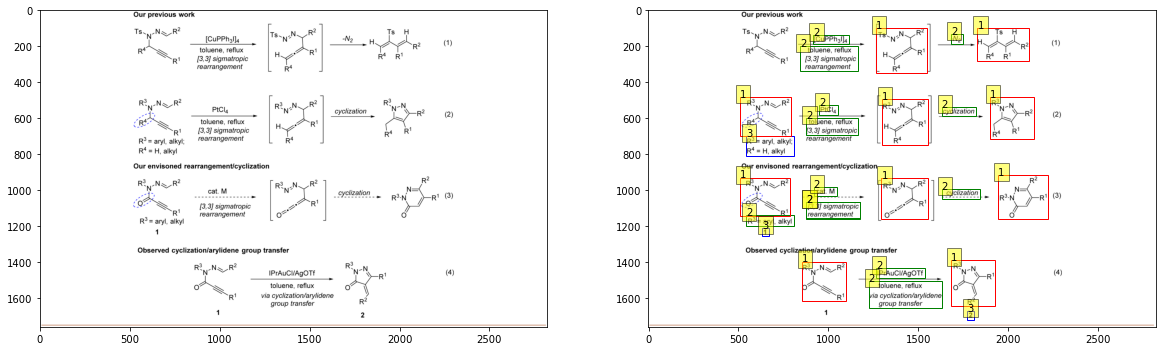

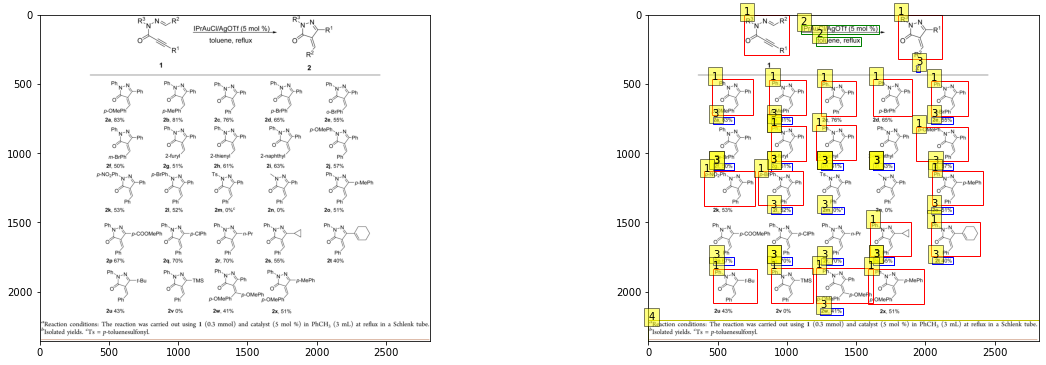

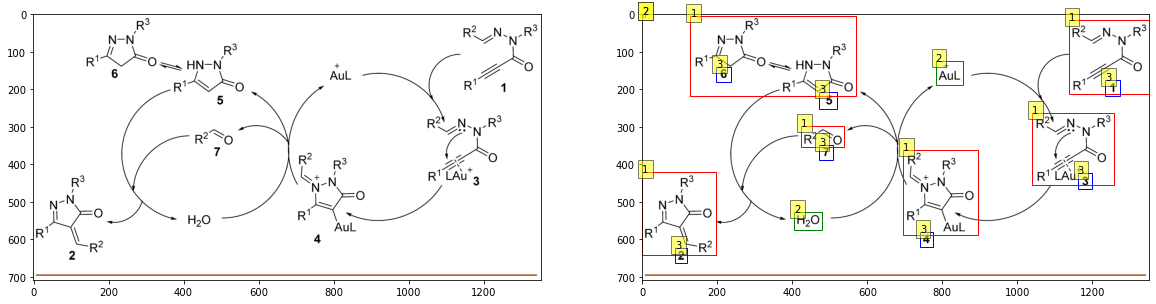

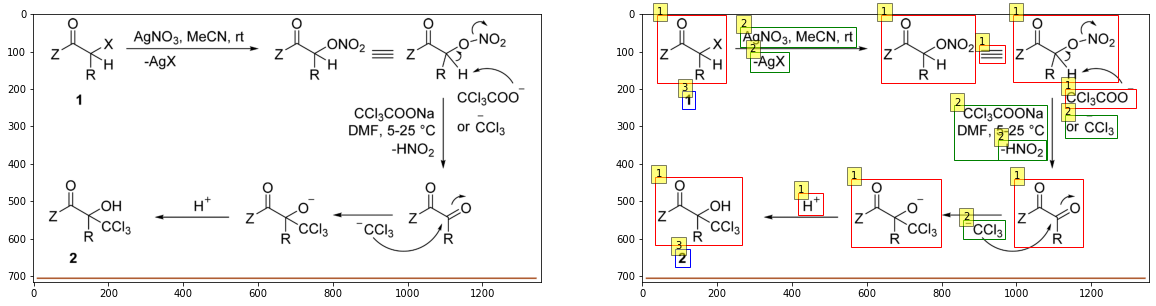

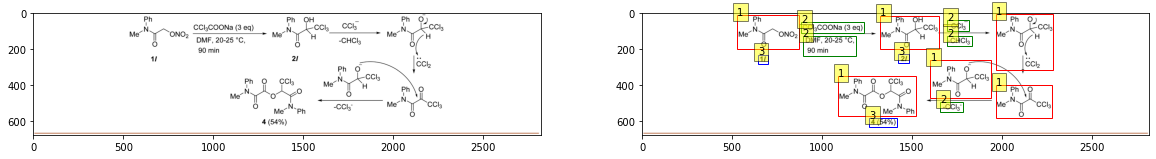

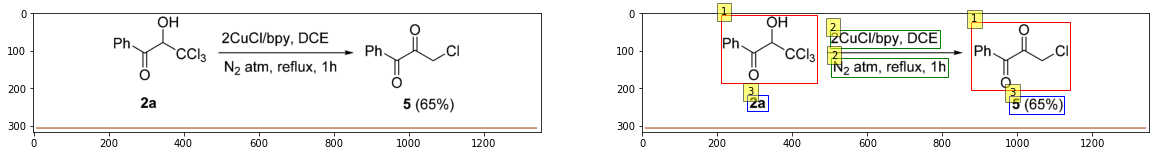

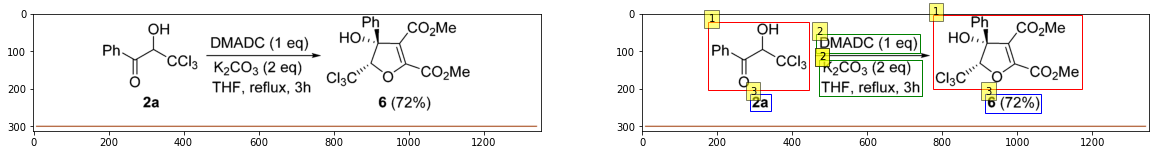

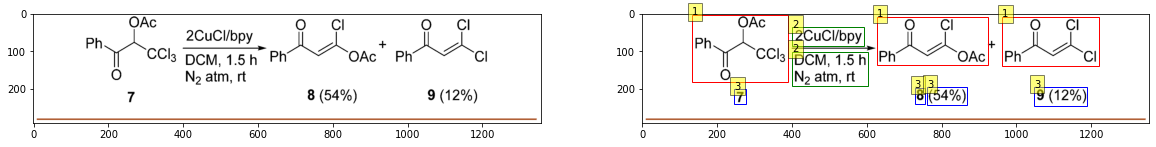

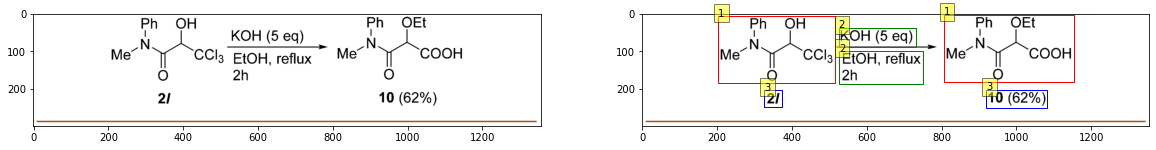

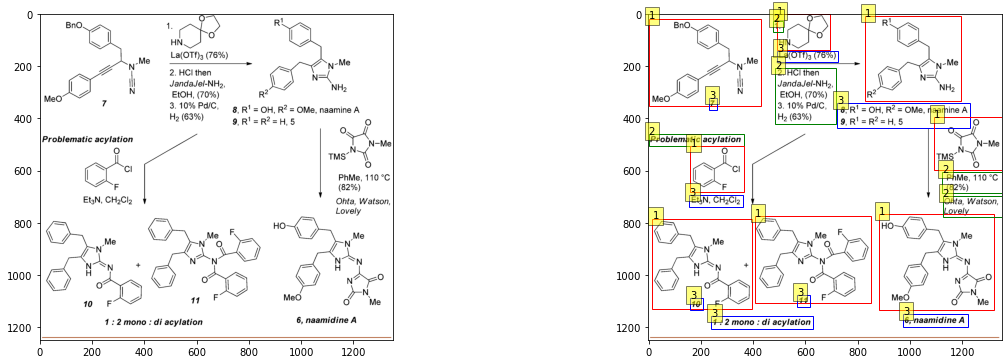

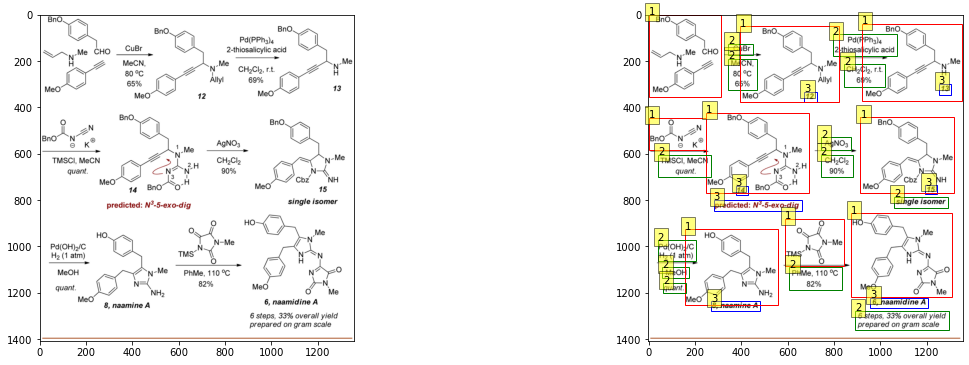

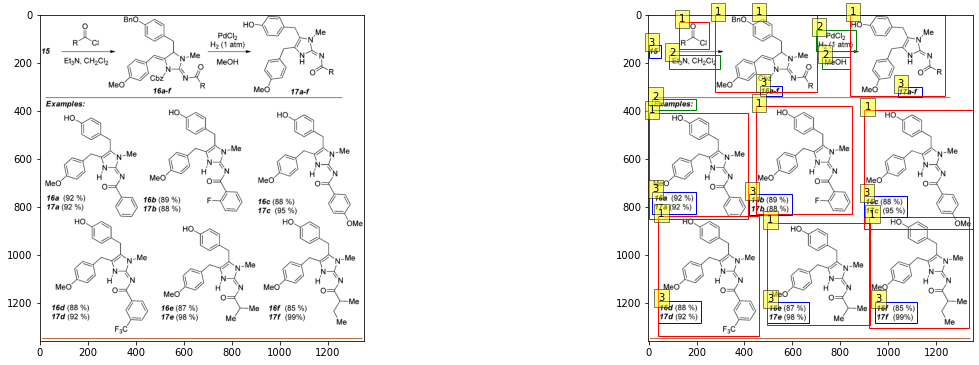

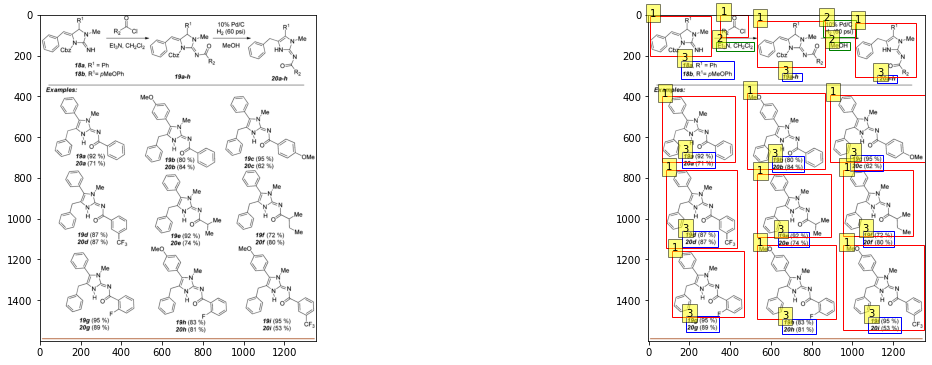

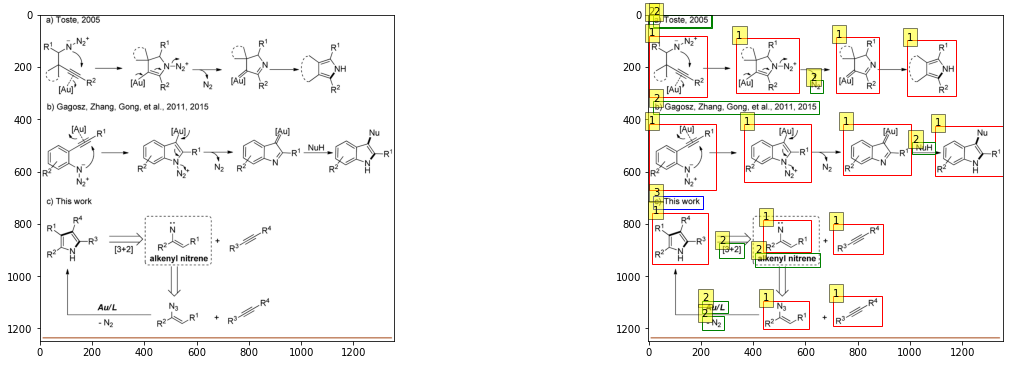

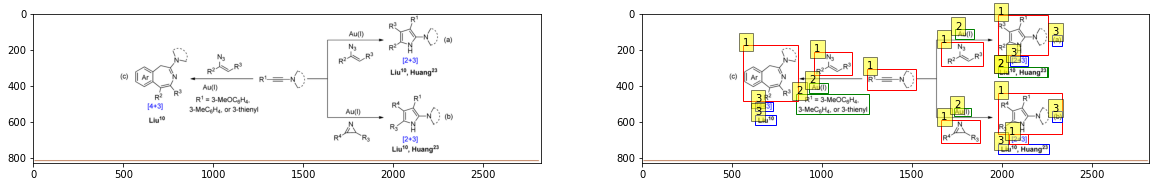

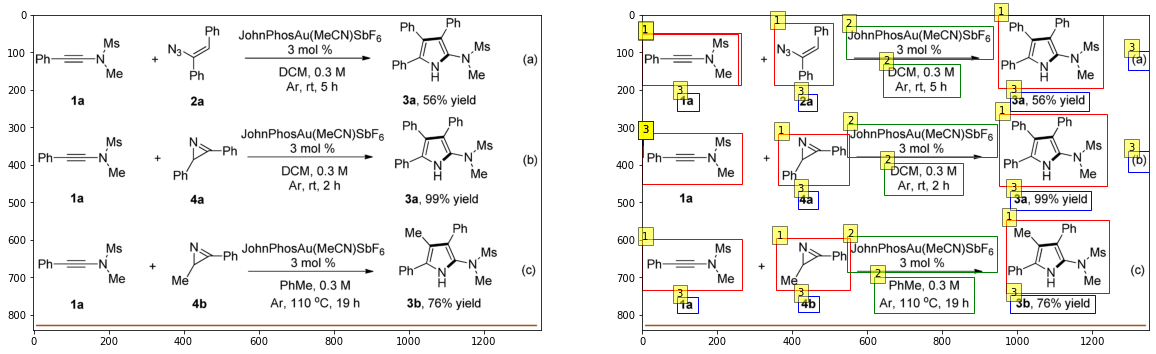

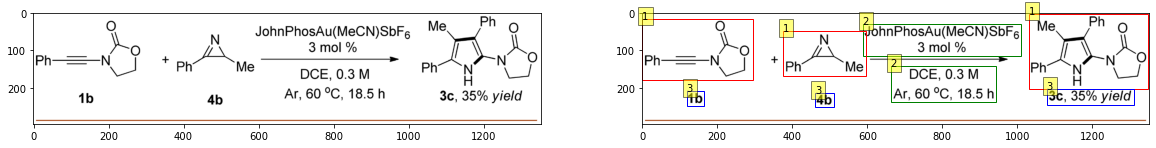

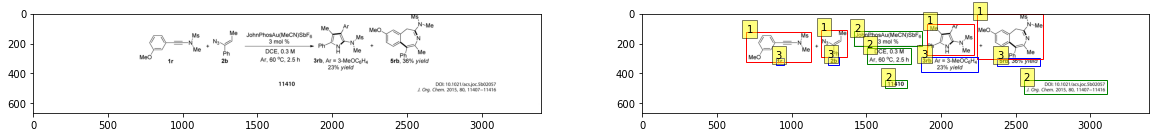

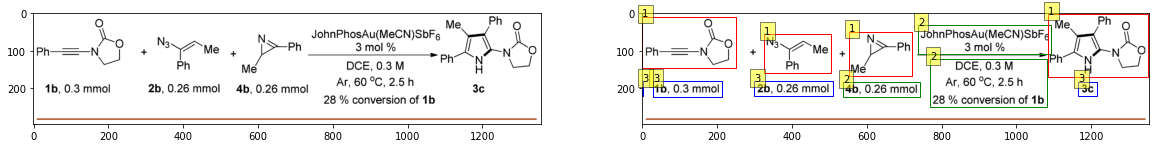

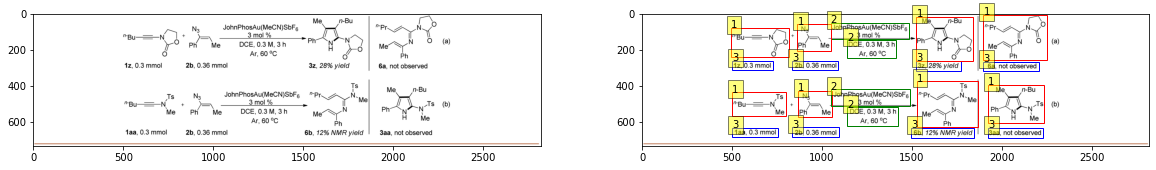

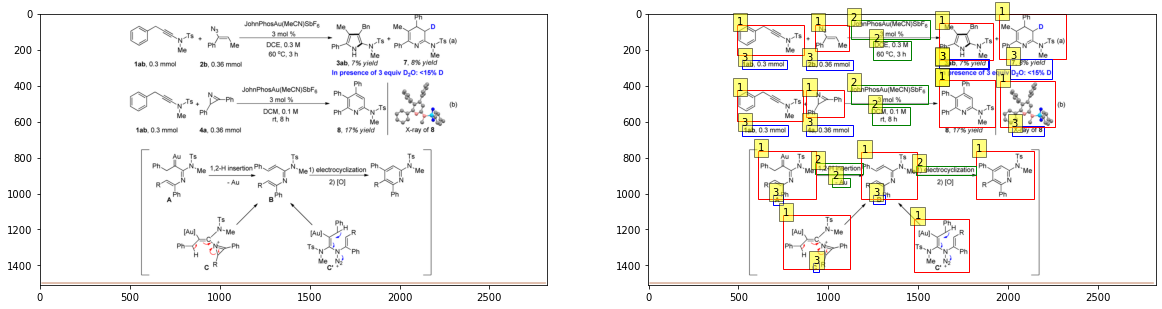

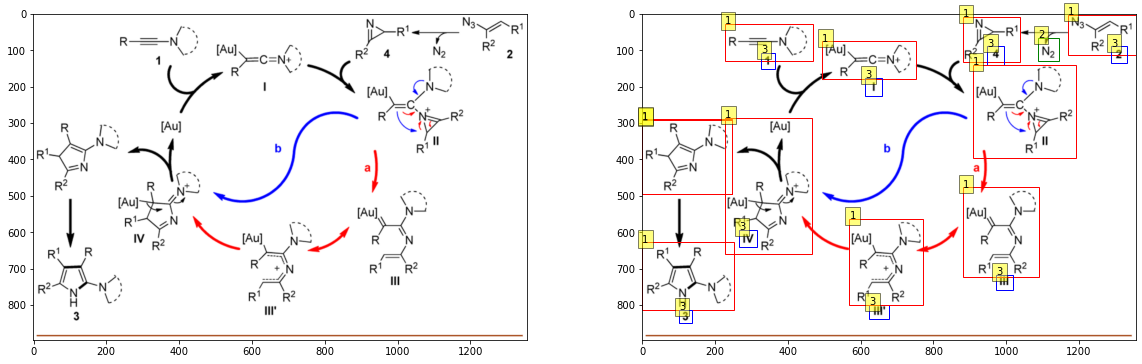

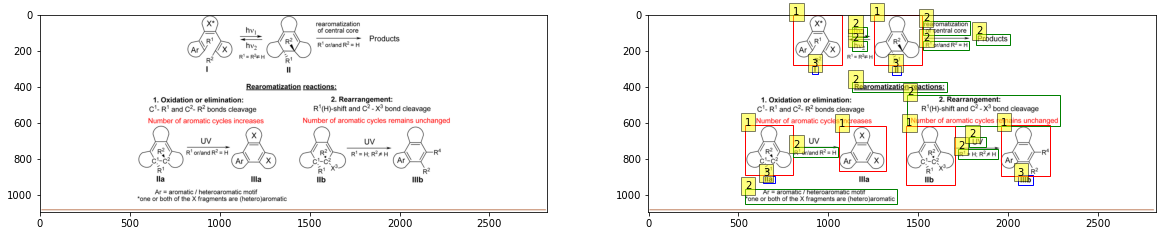

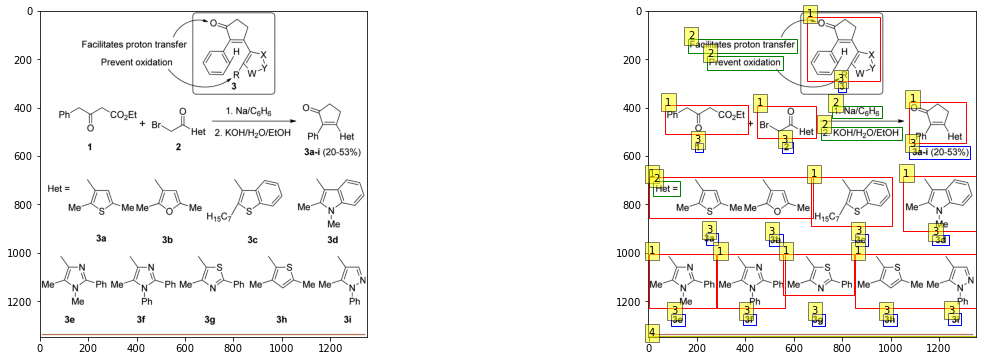

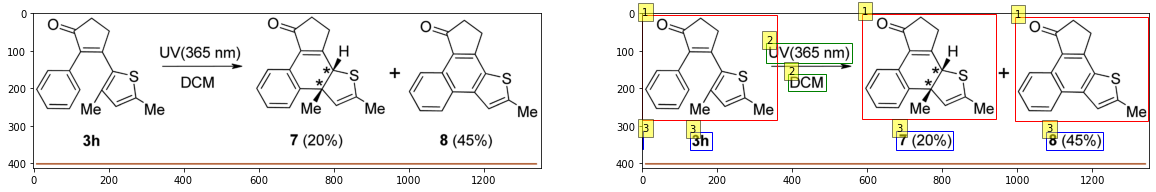

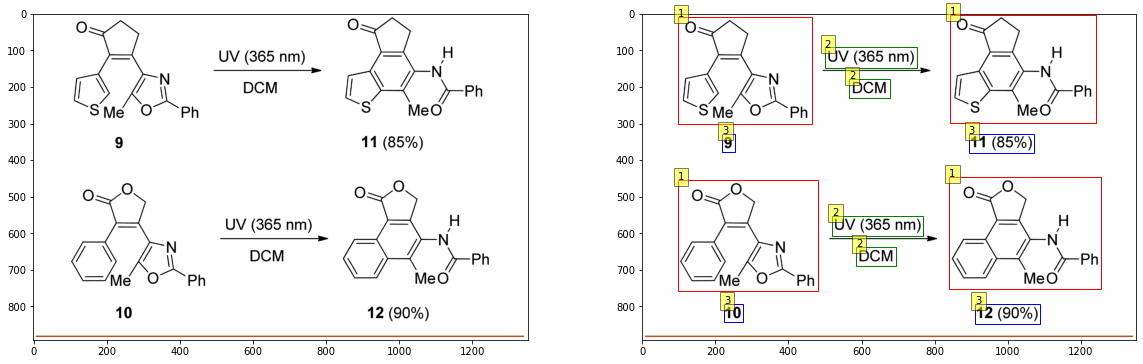

In [112]:
from reaction.data import ImageData, get_bboxes_match
from reaction.evaluate import ReactionEvaluator

# image_base = 'data/detect/images/'
# data_path = 'data/detect/splits/annotations/val.json'
# pred_path = 'output/pix2seq_bbox_rand/prediction_val.json'

image_base = 'preprocess/images/'
data_path = 'preprocess/scheme.json'
pred_path = 'output/pix2seq_bbox_noise32/prediction_scheme.json'

# image_base = 'data/parse/images/'
# data_path = 'data/parse/dev.json'
# pred_path = 'output/pix2seq_reaction_rotate/prediction_dev.json'

with open(data_path) as f:
    data = json.load(f)
with open(pred_path) as f:
    predictions = json.load(f)
    
# evaluator = ReactionEvaluator()
# print(evaluator.evaluate(data['images'], predictions['reaction']))

cnt = 0
for idx, image_data in enumerate(data['images']):
    path = image_base + image_data['file_name']
    img = cv2.imread(path)
#     fig, ax = plt.subplots()
#     ax.imshow(img)
    height, width, _ = img.shape
    if 'reaction' in predictions:
        reactions = predictions['reaction'][idx]
        d = ImageData(image_data, reactions)
        gold_hit, pred_hit = d.evaluate()
        if len(gold_hit) not in [9,15,24]: #or sum(gold_hit) == len(gold_hit):
            continue
        n = max(len(d.gold_reactions), len(d.pred_reactions))
        print(idx, image_data['id'], image_data['file_name'])
#         print(get_bboxes_match(d.gold_reactions[0].bboxes, d.pred_reactions[0].bboxes))
        fig, axes = plt.subplots(n, 2, figsize=(20,n*6))
        if n == 1:
            axes = [axes]
        [ax.set_axis_off() for axs in axes for ax in axs]
        for i, r in enumerate(d.gold_reactions):
            ax = axes[i][0]
            ax.imshow(img)
            ax.set_title(f'gold/{i}: {gold_hit[i]}')
            r.draw(ax)
        for i, r in enumerate(d.pred_reactions):
            ax = axes[i][1]
            ax.imshow(img)
            ax.set_title(f'pred/{i}: {pred_hit[i]}')
            r.draw(ax)
    if 'bbox' in predictions:
        bboxes = predictions['bbox'][idx]
        d = ImageData(image_data, bboxes)
        fig, axes = plt.subplots(1, 2, figsize=(20, 6))
        d.draw_gold(axes[0], img)
        d.draw_prediction(axes[1], img)
    plt.show()
    cnt += 1
    if cnt > 50:
        break

[(1, {'hit': 64, 'reaction': 68, 'image': 68, 'recall': 0.9411764705882353}), (2, {'hit': 21, 'reaction': 24, 'image': 12, 'recall': 0.875}), (3, {'hit': 0, 'reaction': 6, 'image': 2, 'recall': 0.0}), (4, {'hit': 8, 'reaction': 16, 'image': 4, 'recall': 0.5}), (6, {'hit': 3, 'reaction': 6, 'image': 1, 'recall': 0.5}), (7, {'hit': 2, 'reaction': 7, 'image': 1, 'recall': 0.2857142857142857}), (9, {'hit': 3, 'reaction': 9, 'image': 1, 'recall': 0.3333333333333333}), (15, {'hit': 6, 'reaction': 15, 'image': 1, 'recall': 0.4}), (24, {'hit': 11, 'reaction': 24, 'image': 1, 'recall': 0.4583333333333333})]


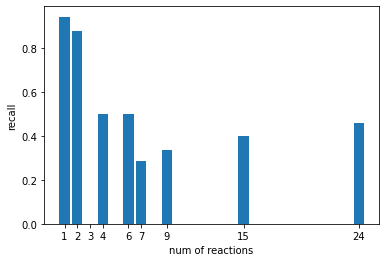

In [33]:
stats = evaluator.evaluate_by_size(data['images'], predictions['reaction'])
print(sorted(stats.items()))

x = sorted(list(stats.keys()))
y = [stats[cnt]['recall'] for cnt in x]
plt.bar(x, y, tick_label=x)
plt.xlabel('num of reactions')
plt.ylabel('recall')
plt.show()

## Inspect dataloader

In [ ]:
import torch

base = 'output/debug/images/'
data = {}
for i in range(10):
    with open(os.path.join(base,f"{i}.json")) as f:
        data[i] = np.array(json.load(f))
        
def inverse_normalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

inversed = {}
for i, img in data.items():
    print(i)
    inversed[i] = inverse_normalize(torch.tensor(img), [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]).permute(1,2,0).numpy()
    plt.imshow(inversed[i])
    plt.show()

## Detection

In [251]:
image_base = 'data/detect/images/'

with open('data/detect/splits/annotations/instances_val2017.json') as f:
    val_data = json.load(f)
    val_images = {img['id']: img for img in val_data['images']}
    val_boxes = {img['id']: [] for img in val_data['images']}
    for anno in val_data['annotations']:
        val_boxes[anno['image_id']].append(anno)

val_pred = torch.load('detect/pix2seq/outputs/finetune/prediction.pth', map_location='cpu')

In [252]:
val_pred[1]

{'scores': tensor([0.9869, 1.0000, 1.0000, 1.0000, 0.9999, 0.9997, 1.0000, 1.0000, 1.0000,
         0.9997, 1.0000]),
 'labels': tensor([2, 1, 1, 3, 3, 2, 1, 3, 1, 3, 4]),
 'boxes': tensor([[1485.7500,    0.0000, 1798.1821,  122.2765],
         [1125.7740,   39.0605, 1400.8502,  212.2855],
         [1896.6661,    5.0949, 2271.9241,  203.7941],
         [2046.0902,  202.0958, 2069.8623,  237.7598],
         [1259.9161,  193.6044, 1312.5541,  237.7598],
         [1480.6561,  146.0524, 1804.9742,  195.3027],
         [2385.6902,   56.0434, 2541.9062,  180.0181],
         [2436.6301,  202.0958, 2475.6841,  237.7598],
         [ 840.5101,   54.3451,  996.7260,  174.9233],
         [ 881.2621,  198.6992,  961.0681,  237.7598],
         [ 283.5660,  259.8375, 3100.5483, 1659.2235]])}

0 op100205s-Table-c3.png


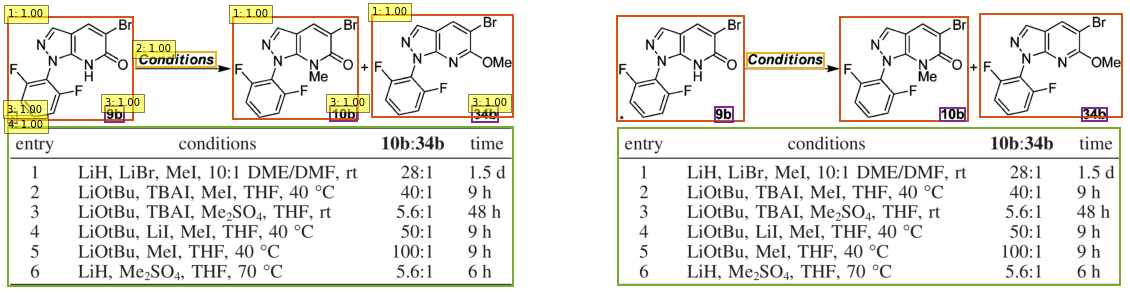

1 op300209p-Figure-c1.png


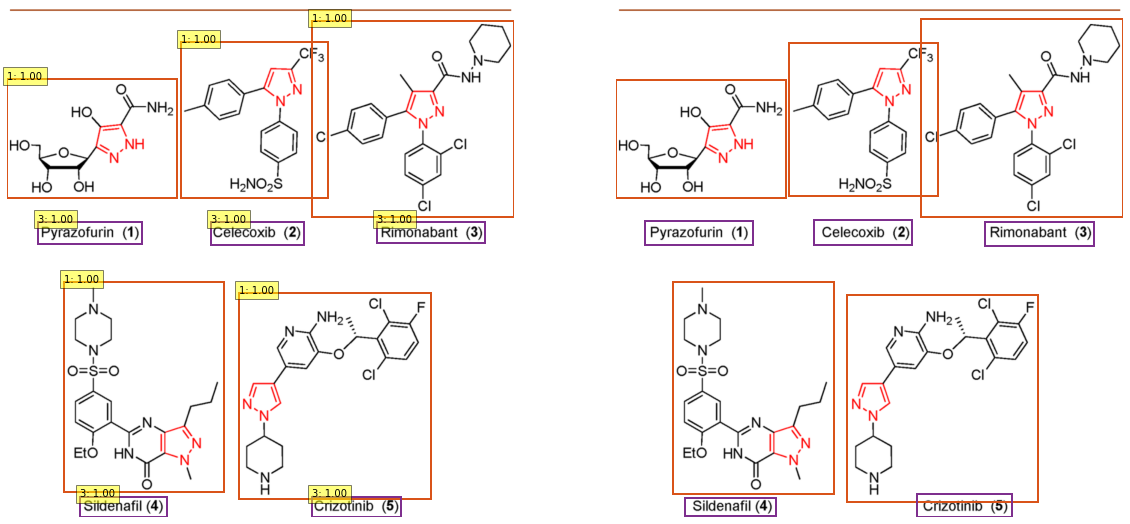

2 jacs.6b00143-Table-c2.png


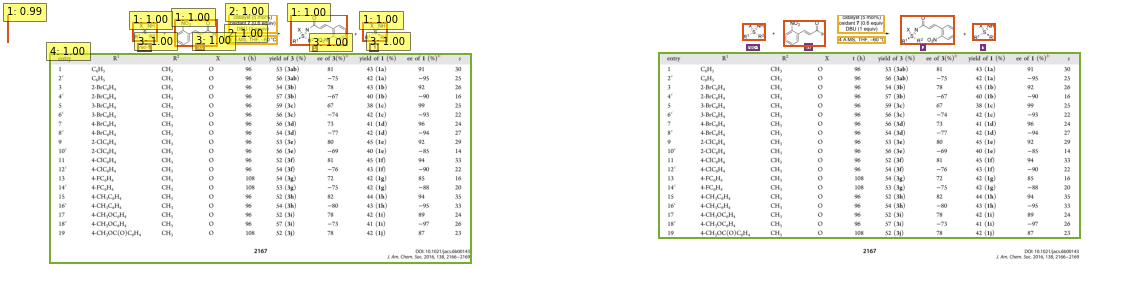

3 ja9039289-Table-c1.png


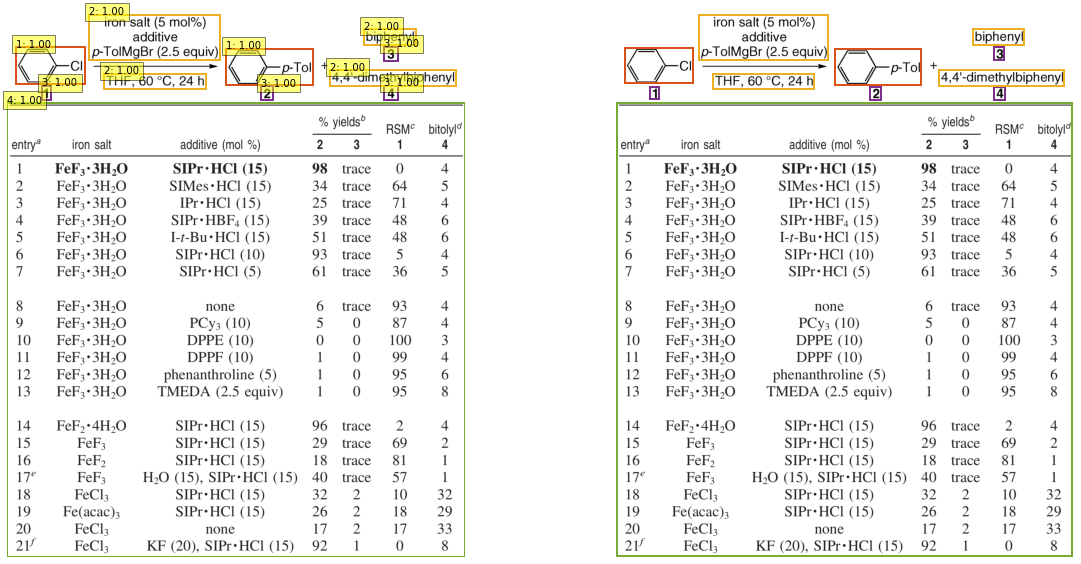

4 jo502408z-Figure-c1.png


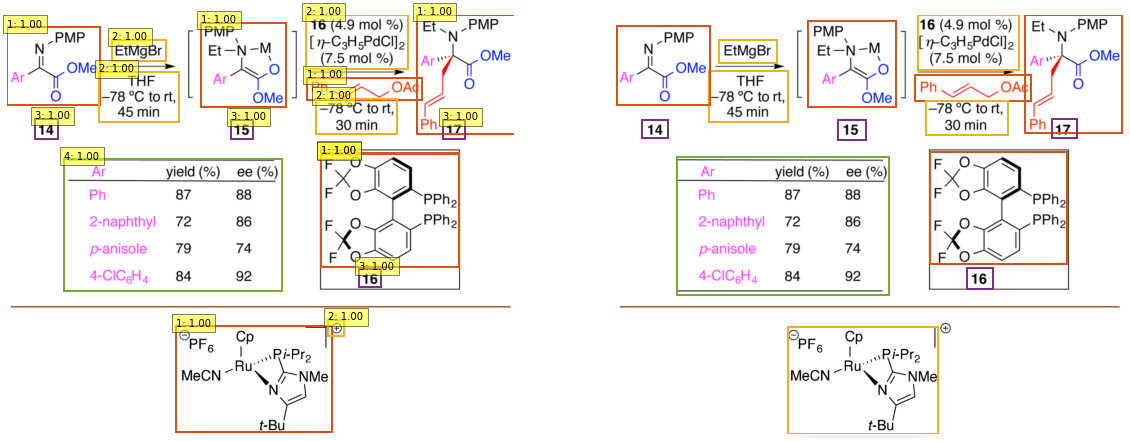

5 ol200038n-Figure-c1.png


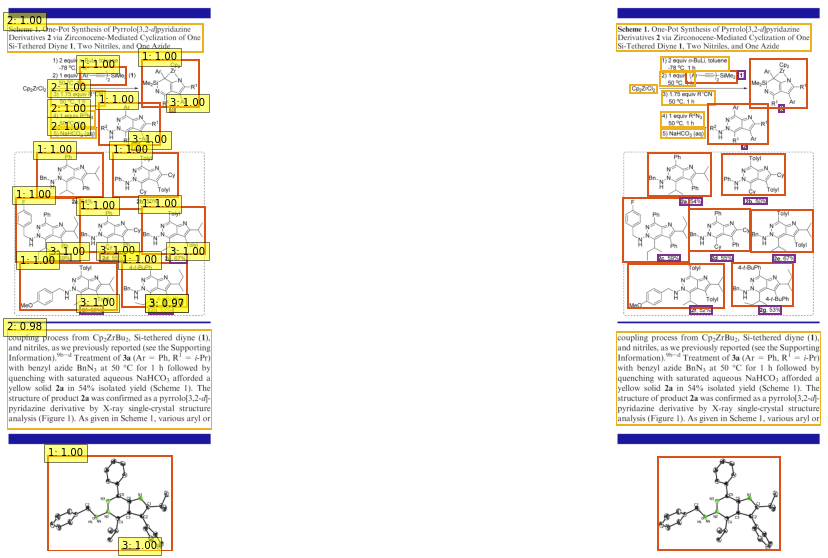

In [250]:
# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results(img, labels, scores, boxes, anno):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(img)
    ax = plt.gca()
    colors = COLORS * 100
    for cl, score, (xmin, ymin, xmax, ymax) in zip(labels, scores, boxes.tolist()):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=COLORS[cl], linewidth=2))
        text = f'{cl}: {score:0.2f}'
        ax.text(xmin, ymin, text, fontsize=10,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(img)
    ax = plt.gca()
    for bbox in anno:
        xmin, ymin, dx, dy = bbox['bbox']
        cl = bbox['category_id']
        ax.add_patch(plt.Rectangle((xmin, ymin), dx, dy,
                                   fill=False, color=COLORS[cl], linewidth=2))
    plt.axis('off')
    plt.show()

cnt = 0
for i, img_data in enumerate(val_data['images']):
    print(i, img_data['file_name'])
    img = cv2.imread(image_base + img_data['file_name'])
    pred = val_pred[img_data['id']]
    keep = pred['scores'] > 0.9
    labels = pred['labels'][keep]
    scores = pred['scores'][keep]
    boxes = pred['boxes'][keep]
    plot_results(img, labels, scores, boxes, val_boxes[img_data['id']])
    cnt += 1
    if cnt > 5:
        break

# Data Augmentation

In [90]:
from main import get_args
from reaction.dataset import ReactionDataset
from reaction.tokenizer import get_tokenizer
import torchvision.transforms.functional as F

class Object(object):
    pass
args = Object()
args.formats = ['reaction']
args.pix2seq = True
args.data_path = 'data/parse'
args.image_path = 'data/parse/images'
args.train_file = 'train.json'
args.augment = True
args.composite_augment = True

tokenizer = get_tokenizer(args)
train_dataset = ReactionDataset(args, args.train_file, tokenizer, split='test', debug=True)

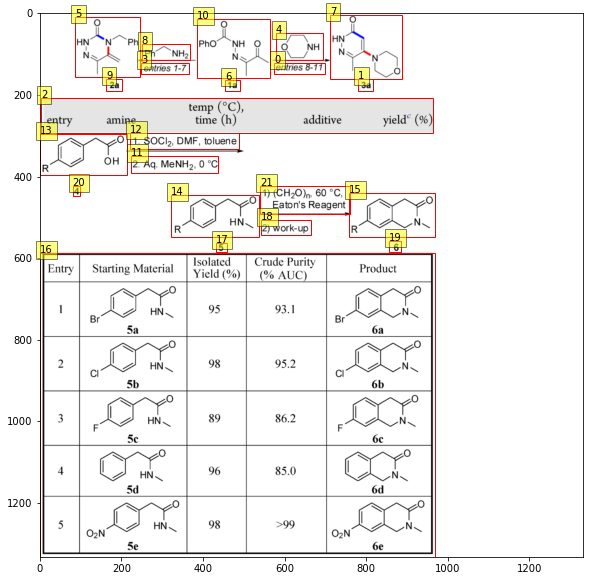

[{'conditions': [8, 3], 'products': [5], 'reactants': [10]}, {'conditions': [4, 0], 'products': [7], 'reactants': [10]}, {'conditions': [12, 11], 'products': [14], 'reactants': [13]}, {'conditions': [21, 18], 'products': [15], 'reactants': [14]}]


In [100]:
image1, target1 = train_dataset.load_and_prepare(2)
image2, target2 = train_dataset.load_and_prepare(5)
image, target = train_dataset.concat(image1, target1, image2, target2)
image, target = train_dataset.transform(image, target)
_, h, w = image.size()
# print(image.size())
plt.figure(figsize=(10, 10))
plt.imshow(F.to_pil_image(image))
ax = plt.gca()
for i, bbox in enumerate(target['boxes']):
    if target['area'][i] == 0:
        continue
    xmin, ymin, xmax, ymax = bbox * torch.tensor([w, h, w, h])
    ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='r', linewidth=1))
    ax.text(xmin, ymin, str(i), fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
plt.show()
# print(target)
print(target['reactions'])